# MOVIE RECOMMENDER BASED ON ITEM BASED COLLABORATIVE FILTERING 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Module 1- Data Acquisition and Preparation 

### Data Preparation

In [ ]:
#importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Merging and converting columns into dataframes
#u.data,u.user and u.item are a tsv files (tab separated values)
user_data_col = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('/content/drive/My Drive/AML_Dev/ml-100k/u.user', sep='|', names=user_data_col,encoding='latin-1', parse_dates=True) 

ratings_data_col = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('/content/drive/My Drive/AML_Dev/ml-100k/u.data', sep='\t', names=ratings_data_col,encoding='latin-1')

movies_data_col= ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('/content/drive/My Drive/AML_Dev/ml-100k/u.item', sep='|', names=movies_data_col, usecols=range(5),encoding='latin-1')
movies1=movies


In [ ]:
#Checking dimensionality of each dataframe:users, movies, ratings
print(users.shape)
print(ratings.shape)
print(movies.shape)

(943, 5)
(100000, 4)
(1682, 5)


In [ ]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [ ]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
#Merging all the datframes together as movie_df
movie_ratings = pd.merge(movies, ratings)
movie_df = pd.merge(movie_ratings, users)

movie_df

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The (1997)",14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Saint%2C%20Th...,729,4,893286638,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,729,3,893286338,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Peacemaker%2C...,729,3,893286299,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,729,1,893286511,19,M,student,56567


In [ ]:
movie_df.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            100000 non-null  int64  
 1   title               100000 non-null  object 
 2   release_date        99991 non-null   object 
 3   video_release_date  0 non-null       float64
 4   imdb_url            99987 non-null   object 
 5   user_id             100000 non-null  int64  
 6   rating              100000 non-null  int64  
 7   unix_timestamp      100000 non-null  int64  
 8   age                 100000 non-null  int64  
 9   sex                 100000 non-null  object 
 10  occupation          100000 non-null  object 
 11  zip_code            100000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 9.9+ MB


In [ ]:
movie_df.describe()

,movie_id,video_release_date,user_id,rating,unix_timestamp,age
count,100000.000000,0.0,100000.00000,100000.000000,1.000000e+05,100000.000000
mean,425.530130,NaN,462.48475,3.529860,8.835289e+08,32.969850
std,330.798356,NaN,266.61442,1.125674,5.343856e+06,11.562623
min,1.000000,NaN,1.00000,1.000000,8.747247e+08,7.000000
25%,175.000000,NaN,254.00000,3.000000,8.794487e+08,24.000000
50%,322.000000,NaN,447.00000,4.000000,8.828269e+08,30.000000
75%,631.000000,NaN,682.00000,4.000000,8.882600e+08,40.000000
max,1682.000000,NaN,943.00000,5.000000,8.932866e+08,73.000000


### Data Preprocessing

In [ ]:
#Dropping unwanted columns from merged dataframe, ratings and 
movie_df.drop(movie_df.columns[[3,4,7]], axis=1, inplace=True)
ratings.drop( "unix_timestamp", inplace = True, axis = 1 ) 
movies.drop(movies.columns[[3,4]], inplace = True, axis = 1 )
movie_df

,movie_id,title,release_date,user_id,rating,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,308,4,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,308,5,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,308,4,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,308,4,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,308,5,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The (1997)",14-Mar-1997,729,4,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,729,3,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,729,3,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,729,1,19,M,student,56567


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   movie_id      100000 non-null  int64 
 1   title         100000 non-null  object
 2   release_date  99991 non-null   object
 3   user_id       100000 non-null  int64 
 4   rating        100000 non-null  int64 
 5   age           100000 non-null  int64 
 6   sex           100000 non-null  object
 7   occupation    100000 non-null  object
 8   zip_code      100000 non-null  object
dtypes: int64(4), object(5)
memory usage: 7.6+ MB


In [ ]:
#No. of times each movies was rated arranged in descending order
#Top 5 movies that were rated more number of times
movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head()


title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [ ]:
#creating a dataframe sorted based on the name of the movie 
#size-having the numbers of times the movie was rated 
#mean-the average rating given for that movie
movie_rat = movie_df.groupby('title').agg({'rating': [np.size, np.mean]})
movie_rat.iloc[600:650,:]

rating          
                                                   size      mean
title                                                            
Ghosts of Mississippi (1996)                         29  3.482759
Giant (1956)                                         51  3.745098
Gigi (1958)                                          41  3.658537
Gilligan's Island: The Movie (1998)                   3  1.333333
Girl 6 (1996)                                        25  2.760000
Girl in the Cadillac (1995)                           1  1.000000
Girls Town (1996)                                     1  3.000000
Glass Shield, The (1994)                              2  2.000000
Glengarry Glen Ross (1992)                           69  3.463768
Glimmer Man, The (1996)                              48  2.750000
Glory (1989)                                        171  4.076023
Go Fish (1994)                                       15  3.200000
Godfather, The (1972)                               413  4.283293
Godfather: Part II, The (1974)                      209  4.186603
Gold Diggers: The Secret of Bear Mountain (1995)     10  3.100000
Golden Earrings (1947)                                2  4.000000
GoldenEye (1995)                                    131  3.206107
Gone Fishin' (1997)                                  11  1.818182
Gone with the Wind (1939)                           171  3.871345
Good Man in Africa, A (1994)                          2  3.000000
Good Morning (1971)                                   1  1.000000
Good Will Hunting (1997)                            198  4.262626
Good, The Bad and The Ugly, The (1966)              137  3.861314
GoodFellas (1990)                                   226  3.951327
Goofy Movie, A (1995)                                20  2.900000
Gordy (1995)                                          3  1.000000
Grace of My Heart (1996)                              8  3.250000
Graduate, The (1967)                                239  4.104603
Grand Day Out, A (1992)                              66  4.106061
Grass Harp, The (1995)                                9  3.222222
Grateful Dead (1995)                                  4  3.500000
Grease (1978)                                       170  3.347059
Grease 2 (1982)                                      24  2.000000
Great Day in Harlem, A (1994)                         1  5.000000
Great Dictator, The (1940)                           46  4.021739
Great Escape, The (1963)                            124  4.104839
Great Expectations (1998)                            27  3.222222
Great Race, The (1965)                               31  3.290323
Great White Hype, The (1996)                         49  2.755102
Gridlock'd (1997)                                    19  3.210526
Grifters, The (1990)                                 89  3.483146
Grosse Fatigue (1994)                                 4  3.250000
Grosse Pointe Blank (1997)                          160  3.675000
Groundhog Day (1993)                                280  3.764286
Grumpier Old Men (1995)                             148  3.040541
Guantanamera (1994)                                   4  3.750000
Guilty as Sin (1993)                                  6  2.166667
Gumby: The Movie (1995)                               5  2.600000
Hackers (1995)                                       33  2.606061
Half Baked (1998)                                    20  2.500000

In [ ]:
#we are picking only those movies that have been rated atleast 50 time, threshold=50
min_df = movie_rat['rating']['size'] >= 50

#sorting the new dataframe on the decreasing order of their average rating
top_movies=movie_rat[min_df].sort_values([('rating', 'mean')], ascending=False).head(25)
top_movies

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Third Man, The (1949)                                  72  4.333333
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark (1981)                        420  4.252381
Vertigo (1958)                                        179  4.251397
Titanic (1997)                                        350  4.245714
Lawrence of Arabia (1962)                             173  4.231214

In [ ]:
top_movie_names=[]
for i in range(0,25):
  top_movie_names.append(top_movies.iloc[[i][0]].name)
top_movie_names

['Close Shave, A (1995)',
 "Schindler's List (1993)",
 'Wrong Trousers, The (1993)',
 'Casablanca (1942)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)',
 'Shawshank Redemption, The (1994)',
 'Rear Window (1954)',
 'Usual Suspects, The (1995)',
 'Star Wars (1977)',
 '12 Angry Men (1957)',
 'Third Man, The (1949)',
 'Citizen Kane (1941)',
 'To Kill a Mockingbird (1962)',
 "One Flew Over the Cuckoo's Nest (1975)",
 'Silence of the Lambs, The (1991)',
 'North by Northwest (1959)',
 'Godfather, The (1972)',
 'Secrets & Lies (1996)',
 'Good Will Hunting (1997)',
 'Manchurian Candidate, The (1962)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
 'Raiders of the Lost Ark (1981)',
 'Vertigo (1958)',
 'Titanic (1997)',
 'Lawrence of Arabia (1962)']

### Data visualization 

In [ ]:
#The histogram depicts the ditribution of users who have provided different ratings

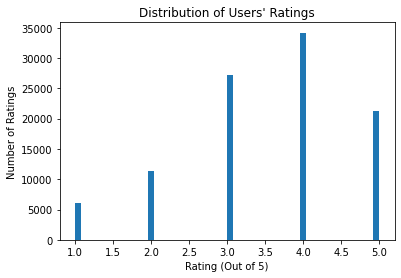

In [ ]:
ratings.rating.plot.hist(bins=50)
plt.title("Distribution of Users' Ratings")
plt.ylabel('Number of Ratings')
plt.xlabel('Rating (Out of 5)');

In [ ]:
#The histogram depicts the distribution of age of different users who have rated the movies

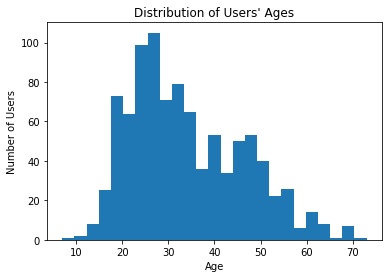

In [ ]:
users.age.plot.hist(bins=25)
plt.title("Distribution of Users' Ages")
plt.ylabel('Number of Users')
plt.xlabel('Age');

In [ ]:
#pivot table takes simple column-wise data as input
#groups the entries into a two-dimensional table
#provides a multidimensional summarization of the data.

In [ ]:
ratings_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,1.0,5.0,4.0,5.0,0.0,3.0,5.0,0.0,5.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,4.0,3.0,3.0,4.0,0.0,3.0,5.0,3.0,5.0,0.0,0.0,5.0,0.0,3.0,3.0,0.0,4.0,3.0,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,3.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings_matrix.shape

(1682, 943)

In [ ]:
from sklearn.metrics import pairwise_distances
#from scipy.spatial.distance import cosine, correlation

#pairwise distance provide distance between two array.so more pairwise distance means less similarity
#cosine similarity is 1-pairwise_distance so more cosine similarity means more similarity between two arrays.

movie_similarity = 1 - pairwise_distances( ratings_matrix.values, metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix = pd.DataFrame( movie_similarity )
ratings_matrix.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,0.468291,0.460392,0.417509,0.347678,0.574377,0.224120,0.273916,0.046232,0.191772,0.232930,0.339196,0.527169,0.338105,0.467598,0.567950,0.227295,0.208472,0.592877,0.361657,0.150959,0.439441,0.259257,0.288536,0.090654,0.136757,0.108560,0.069805,0.368420,0.278386,0.246123,...,0.065390,0.010550,0.023592,0.014155,0.023592,0.023592,0.023592,0.023592,0.023592,0.014226,0.0,0.058979,0.047183,0.032856,0.035387,0.048189,0.058979,0.058979,0.035387,0.0,0.0,0.067404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033363,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,0.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,0.468506,0.459946,0.213972,0.125463,0.253162,0.098185,0.390438,0.113063,0.030692,0.091550,0.319308,0.483349,0.278182,0.434907,0.306639,0.206481,0.408737,0.483077,0.581119,0.089355,0.462797,0.160738,0.479187,0.072342,0.087347,0.215247,0.184592,0.562970,0.334570,0.256668,...,0.049324,0.035017,0.078299,0.046980,0.078299,0.078299,0.078299,0.078299,0.078299,0.000000,0.0,0.000000,0.078299,0.000000,0.104399,0.000000,0.000000,0.000000,0.104399,0.0,0.0,0.074571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055366,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,0.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,0.361165,0.319295,0.271402,0.190242,0.266335,0.167609,0.404239,0.126564,0.105377,0.187733,0.194546,0.293732,0.233814,0.381910,0.306447,0.214125,0.261303,0.269296,0.253074,0.126347,0.259129,0.185187,0.404930,0.179008,0.046315,0.073332,0.051270,0.240534,0.277311,0.176729,...,0.036615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009736,0.0,0.000000,0.096875,0.000000,0.000000,0.000000,0.064583,0.064583,0.096875,0.0,0.0,0.018452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,0.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,0.588337,0.584884,0.397251,0.266764,0.330457,0.169240,0.404889,0.100856,0.129363,0.208262,0.256467,0.572811,0.446568,0.413422,0.422300,0.380248,0.370192,0.531380,0.429785,0.216894,0.480685,0.351676,0.467377,0.127933,0.062932,0.170815,0.143852,0.457528,0.456760,0.331256,...,0.023691,0.016819,0.037609,0.022565,0.037609,0.037609,0.037609,0.037609,0.037609,0.000000,0.0,0.000000,0.056413,0.069838,0.000000,0.000000,0.075218,0.075218,0.000000,0.0,0.0,0.064472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039890,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,0.000000,0.037299,0.334769,0.259161,0.272448,0.055453,0.375809,0.373824,0.196495,0.103288,0.265123,0.112156,0.389191,0.077737,0.088631,0.061197,0.192679,0.319438,0.245088,0.237436,0.284242,0.228855,0.242739,0.326892,0.321288,0.127992,0.338714,0.151706,0.280778,0.110782,0.041288,0.213947,0.058926,0.391974,0.287402,0.272573,...,0.039565,0.028088,0.062807,0.037684,0.062807,0.062807,0.062807,0.062807,0.062807,0.000000,0.0,0.000000,0.094211,0.000000,0.094211,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.053835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211


In [ ]:
ratings_matrix.shape

(1682, 1682)

In [ ]:
try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    
    
    
    user_inp="Speed (1994)"
    inp=movies[movies['title']==user_inp].index.tolist()
    inp=inp[0]
    
    movies['similarity'] = ratings_matrix.iloc[inp]
    movies.columns = ['movie_id', 'title', 'release_date','similarity']
    movies.head(2)
    
except:
    print("Sorry, the movie is not in the database!")

In [ ]:
rec_movies=movies.sort_values( ["similarity"], ascending = False )[1:10]
print("Recommended movies based on your choice of ",user_inp ,": \n", rec_movies.iloc[:,1])


Recommended movies based on your choice of  Speed (1994) : 
 384                             True Lies (1994)
160                               Top Gun (1986)
78                          Fugitive, The (1993)
95             Terminator 2: Judgment Day (1991)
194                       Terminator, The (1984)
173               Raiders of the Lost Ark (1981)
209    Indiana Jones and the Last Crusade (1989)
549            Die Hard: With a Vengeance (1995)
203                    Back to the Future (1985)
Name: title, dtype: object


In [ ]:
import random
rand=random.randint(0,99999)
rand_movie=movie_df.loc[rand,'title']
print(rand_movie)
str1=''
for i in rand_movie:
  if i!='(':
    str1=str1+i
  else:
    break
print(str1)

Free Willy (1993)
Free Willy 


In [ ]:
!pip3 install wikipedia-api
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('en')
page_py = wiki_wiki.page(str1)
print(page_py.summary)

Free Willy is a 1993 American family drama film, directed by Simon Wincer, produced by Lauren Shuler Donner and Jennie Lew Tugend, written by Keith A. Walker and Corey Blechman from a story by Walker and distributed by Warner Bros. under their Family Entertainment imprint. Starring Jason James Richter, in his film debut, Lori Petty, Jayne Atkinson, August Schellenberg and Michael Madsen, the film is about an orphan boy who befriends a captive orca while being ordered to clean up graffiti at an amusement park as part of his probation for vandalizing the observation area until he discovers a secret involving the park's greedy owner who plans to kill the whale for money.
Shot between May and August 1992 and released on July 16, 1993, the film received positive attention from critics and was a commercial success, grossing $153.6 million from a $20 million budget. 
It grew into a small franchise, including a television series, two sequels and a direct-to-video reboot.


In [ ]:
!pip install imdbpy
from imdb import IMDb
def search_movie_genre(name1):
  # create an instance of the IMDb class
  ia = IMDb()
  name=name1
  search = ia.search_movie(name)

  # get a movie
  movie = ia.get_movie(search[0].movieID)
  genres=[]
  # print the genres of the movie
  for genre in movie['genres']:
      genres.append(genre)
  return genres

In [ ]:
search_movie_genre(rand_movie)

['Adventure', 'Drama', 'Family']

In [ ]:
top_movie_names

['Close Shave, A (1995)',
 "Schindler's List (1993)",
 'Wrong Trousers, The (1993)',
 'Casablanca (1942)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)',
 'Shawshank Redemption, The (1994)',
 'Rear Window (1954)',
 'Usual Suspects, The (1995)',
 'Star Wars (1977)',
 '12 Angry Men (1957)',
 'Third Man, The (1949)',
 'Citizen Kane (1941)',
 'To Kill a Mockingbird (1962)',
 "One Flew Over the Cuckoo's Nest (1975)",
 'Silence of the Lambs, The (1991)',
 'North by Northwest (1959)',
 'Godfather, The (1972)',
 'Secrets & Lies (1996)',
 'Good Will Hunting (1997)',
 'Manchurian Candidate, The (1962)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
 'Raiders of the Lost Ark (1981)',
 'Vertigo (1958)',
 'Titanic (1997)',
 'Lawrence of Arabia (1962)']

In [ ]:
genre_top_movies=[]
for i in range(0,25):
  temp=top_movie_names[i]
  temp_movie_name=""
  for j in temp:
    if j!="(":
      temp_movie_name=temp_movie_name+j
    else:
      break
  temp_genre_2=search_movie_genre(temp_movie_name)
  genre_top_movies.append(temp_genre_2)



In [ ]:
genre_name=input("Enter genre: ")
for i in range(0,25):
  if genre_name in genre_top_movies[i]:
    print(top_movie_names[i])

Enter genre: Drama
Schindler's List (1993)
Casablanca (1942)
Shawshank Redemption, The (1994)
12 Angry Men (1957)
Citizen Kane (1941)
To Kill a Mockingbird (1962)
One Flew Over the Cuckoo's Nest (1975)
Silence of the Lambs, The (1991)
Godfather, The (1972)
Secrets & Lies (1996)
Good Will Hunting (1997)
Manchurian Candidate, The (1962)
Titanic (1997)
Lawrence of Arabia (1962)


In [ ]:
def search_gnr(genre_term,genre_top_movies):

  print(genre_top_movies)
  gnr_list=[]
  j=0
  for i in range(0,25):
    if genre_term in genre_top_movies[i]:
      gnr_list.append(top_movie_names[i])
      j=1
  return j,gnr_list

In [ ]:
a,b=search_gnr("War",genre_top_movies)
print(a)
print(b)

[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'], ['Biography', 'Drama', 'History'], ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'], ['Drama', 'Romance', 'War'], ['Talk-Show'], ['Drama'], ['Mystery', 'Thriller'], ['Crime', 'Mystery', 'Thriller'], ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], ['Crime', 'Drama'], ['Film-Noir', 'Mystery', 'Thriller'], ['Drama', 'Mystery'], ['Crime', 'Drama'], ['Drama'], ['Crime', 'Drama', 'Thriller'], ['Adventure', 'Mystery', 'Thriller'], ['Crime', 'Drama'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], ['Comedy'], ['Action', 'Adventure'], ['Mystery', 'Romance', 'Thriller'], ['Drama', 'Romance'], ['Adventure', 'Biography', 'Drama', 'History', 'War']]
1
['Casablanca (1942)', 'Lawrence of Arabia (1962)']


In [ ]:
genre_top_movies

[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'],
 ['Biography', 'Drama', 'History'],
 ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'],
 ['Drama', 'Romance', 'War'],
 ['Talk-Show'],
 ['Drama'],
 ['Mystery', 'Thriller'],
 ['Crime', 'Mystery', 'Thriller'],
 ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Film-Noir', 'Mystery', 'Thriller'],
 ['Drama', 'Mystery'],
 ['Crime', 'Drama'],
 ['Drama'],
 ['Crime', 'Drama', 'Thriller'],
 ['Adventure', 'Mystery', 'Thriller'],
 ['Crime', 'Drama'],
 ['Comedy', 'Drama'],
 ['Drama', 'Romance'],
 ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure'],
 ['Mystery', 'Romance', 'Thriller'],
 ['Drama', 'Romance'],
 ['Adventure', 'Biography', 'Drama', 'History', 'War']]

Front end


In [ ]:
#HTML STRTS HERE
# first we install the required packages
!pip install flask-ngrok

In [ ]:

with open("/content/drive/My Drive/AML_Dev/Base100.html") as report_file:
  raw_html = report_file.readlines()
  basic_html = """""".join(raw_html)

with open("/content/drive/My Drive/AML_Dev/Base101.html") as report_file:
  raw_html = report_file.readlines()
  about_html = """""".join(raw_html)

with open("/content/drive/My Drive/AML_Dev/type_pick (1).html") as report_file:
  raw_html = report_file.readlines()
  type_html = """""".join(raw_html)



import base64
data_uri = base64.b64encode(open('/content/drive/My Drive/AML_Dev/PIC1.png', 'rb').read()).decode('utf-8')
#img_tag1 = '<img src="data:image/png;base64,{0}" width="70" height="70">'.format(data_uri)
img_tag1= '<img src="https://i.ibb.co/t2RW07q/PIC1.png" width="70" height="70">'

data_uri = base64.b64encode(open('/content/drive/My Drive/AML_Dev/PIC2.png', 'rb').read()).decode('utf-8')
#img_tag2 = '<img src="data:image/png;base64,{0}" width="70" height="70">'.format(data_uri)
img_tag2= '<img src="https://i.ibb.co/8BbBhP8/PIC2.png" width="70" height="70">'

data_uri = base64.b64encode(open('/content/drive/My Drive/AML_Dev/PIC3.png', 'rb').read()).decode('utf-8')
#img_tag3 = '<img src="data:image/png;base64,{0}" width="70" height="70">'.format(data_uri)
img_tag3= '<img src="https://i.ibb.co/xzzdZm3/PIC3.png" width="70" height="70">'


data_uri = base64.b64encode(open('/content/drive/My Drive/AML_Dev/PIC4.png', 'rb').read()).decode('utf-8')
#img_tag4 = '<img src="data:image/png;base64,{0}" width="70" height="70">'.format(data_uri)
img_tag4= '<img src="https://i.ibb.co/TKVB30n/PIC4.png" width="70" height="70">'

data_uri = base64.b64encode(open('/content/drive/My Drive/AML_Dev/python-logo.jpg', 'rb').read()).decode('utf-8')
#img_logo = '<img src="data:image/png;base64,{0}" width="237" height="248">'.format(data_uri)
img_logo = '<img src="https://i.ibb.co/cCpJcx2/python-logo.jpg" width="237" height="248">'


In [ ]:
# I am importing the packages that I want to use
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, Response, request
# configure the Flask and tell the Flask it will use the ngrok
# what does ngrok do? It connects my local web app to internet so people can see my web app
app = Flask(__name__)
run_with_ngrok(app)

In [ ]:
list_of_movies=movie_df['title']
list_of_movies

0                  Toy Story (1995)
1                 Get Shorty (1995)
2                    Copycat (1995)
3             Twelve Monkeys (1995)
4                       Babe (1995)
                    ...            
99995             Saint, The (1997)
99996    Tomorrow Never Dies (1997)
99997        Peacemaker, The (1997)
99998           Home Alone 3 (1997)
99999              Mr. Magoo (1997)
Name: title, Length: 100000, dtype: object

In [ ]:

def search_box(search_term,list_of_movies):
  search_flag=0
  search_status=0
  matches=[]

  for i in range(0,len(list_of_movies)):
    if search_term.lower() == list_of_movies[i].lower():
      #print("got it")
      search_flag=1
      search_status=1
      break
  if (search_flag==0):
    for movie_name in list_of_movies:
        if search_term.lower() in movie_name.lower():
            matches.append(movie_name)
    if (len(matches)>0):
      #print(search_term)
      #print(matches)
      search_status=2
    else:
      search_status=3
  return (search_status,matches)
  


movie_term="GoldenEye (1995)"
#print(list_of_movies.head())
find_flag,check_list=search_box(movie_term,list_of_movies)

if (find_flag==1):
  print("found")
elif (find_flag==2):
  print("Did you spell it correctly? or Did you mean")
  print(check_list)
else:
  print("Oopsie...we don't have it in our collection")



found


In [ ]:
  first_divA  = 2272
  first_divB  = 3088
  second_divB = 3188
  first_divC  = 3256
  second_divC = 3433
 
  head_str=basic_html[:first_divA]
  mid1_str=basic_html[first_divB:second_divB]
  mid2_str=basic_html[first_divC:second_divC]
  tail_str=basic_html[second_divC:]
 # head_str,mid_str,tail_str=skelton_html[:first_div],skelton_html[first_div:second_div],skelton_html[second_div:]
  print(mid1_str)


			</table>	
			
			
			</td></tr>
		</table>
	</td>
	<td style="text-align: right" "width:50%">
		


In [ ]:
#recommendation engine

def recommendation_engine(movie_term):
  global movies
  global ratings_matrix
  inp=movies[movies['title']==movie_term].index.tolist()
  inp=inp[0]
  
  movies['similarity'] = ratings_matrix.iloc[inp]
  movies.columns = ['movie_id', 'title', 'release_date','similarity']
  movies.head(2)
  #print(type(movies.sort_values( ["similarity"], ascending = False )[1:10]))
  if (len(movies.columns)>10):
  #if (movies.shape[1]>10):
    my_data=pd.DataFrame(movies.sort_values( ["similarity"], ascending = False )[1:10])
  else:
    my_data=pd.DataFrame(movies.sort_values( ["similarity"], ascending = False )[1:])
  my_data_conv=my_data["title"].reset_index()
  my_list=my_data_conv["title"].tolist()
  return my_list

print(recommendation_engine("Speed (1994)"))

['True Lies (1994)', 'Top Gun (1986)', 'Fugitive, The (1993)', 'Terminator 2: Judgment Day (1991)', 'Terminator, The (1984)', 'Raiders of the Lost Ark (1981)', 'Indiana Jones and the Last Crusade (1989)', 'Die Hard: With a Vengeance (1995)', 'Back to the Future (1985)', 'Batman (1989)', 'Empire Strikes Back, The (1980)', 'Clear and Present Danger (1994)', 'Braveheart (1995)', 'Die Hard 2 (1990)', 'Forrest Gump (1994)', 'Star Trek: The Wrath of Khan (1982)', 'Aladdin (1992)', 'Net, The (1995)', 'Star Trek IV: The Voyage Home (1986)', 'Die Hard (1988)', 'Apollo 13 (1995)', 'E.T. the Extra-Terrestrial (1982)', 'Aliens (1986)', 'Groundhog Day (1993)', 'Seven (Se7en) (1995)', 'Princess Bride, The (1987)', 'When Harry Met Sally... (1989)', 'Lion King, The (1994)', 'Sound of Music, The (1965)', 'Mrs. Doubtfire (1993)', 'Batman Returns (1992)', 'Dances with Wolves (1990)', 'Pulp Fiction (1994)', 'GoldenEye (1995)', 'Hunt for Red October, The (1990)', 'Clueless (1995)', 'Crow, The (1994)', 'Und

In [ ]:
#search for similar words
def suggestion_maker(search_term, movies_list):
  matches=[]
  for movie_name in movies_list:
      if search_term in movie_name:
          matches.append(movie_name)
  return matches

print()

In [ ]:
import random

In [ ]:
def type_page(list_of_movies):
  global type_html,img_logo

  cooked_page=type_html[:2817]#1
  cooked_page=cooked_page+img_logo
  cooked_page=cooked_page+type_html[2887:3062]

  for i in range(0,5):
    j=random.randint(0,len(list_of_movies))
    j_speed=(i+1)*5
    cooked_page=cooked_page+"<marquee width=\"100%\" behavior=\"alternate\" direction=\"right\" scrollamount=\""+str(j_speed)+"\"><font color=\"#FFFFFF\" size=\"3\">"+str(list_of_movies[j])+"</font></marquee>"


  cooked_page=cooked_page+type_html[3062:]
  return cooked_page



  #print(type_html[3062:])




#type_page(list_of_movies)

In [ ]:
  def about_page(list_of_movies):
    global about_html,img_tag1,img_tag2,img_tag3,img_tag4,img_logo

    cooked_page=about_html[:2184]#1
    cooked_page=cooked_page+img_tag1
    cooked_page=cooked_page+about_html[2185:2380]#2
    cooked_page=cooked_page+img_tag2
    cooked_page=cooked_page+about_html[2380:2441]#3
    cooked_page=cooked_page+img_tag3
    cooked_page=cooked_page+about_html[2442:2641]#4
    cooked_page=cooked_page+img_tag4
    cooked_page=cooked_page+about_html[2642:2760]#lo
    cooked_page=cooked_page+img_logo
    cooked_page=cooked_page+about_html[2761:2942]#scroll

    for i in range(0,5):
      j=random.randint(0,len(list_of_movies))
      j_speed=(i+1)*5
      cooked_page=cooked_page+"<marquee width=\"100%\" behavior=\"alternate\" direction=\"right\" scrollamount=\""+str(j_speed)+"\"><font color=\"#FFFFFF\" size=\"3\">"+str(list_of_movies[j])+"</font></marquee>"

    cooked_page=cooked_page+about_html[2943:]
    
    return cooked_page




In [ ]:

def html_oven_0(head_str,mid1_str,mid2_str,tail_str,list_of_movies):
  global basic_html

  cooked_page=basic_html[:3188]
  #cooked_page=head_str+mid1
  cooked_page=cooked_page+img_logo
  cooked_page=cooked_page+mid2_str
  
  for i in range(0,5):
    j=random.randint(0,len(list_of_movies))
    j_speed=(i+1)*5
    cooked_page=cooked_page+"<marquee width=\"100%\" behavior=\"alternate\" direction=\"right\" scrollamount=\""+str(j_speed)+"\"><font color=\"#FFFFFF\" size=\"3\">"+str(list_of_movies[j])+"</font></marquee>"
  cooked_page=cooked_page+tail_str
  return cooked_page

#search found
def html_oven_1(head_str,mid1_str,mid2_str,tail_str,list_of_movies,movie_term):
  cooked_page=head_str
  cooked_page=cooked_page+"<tr><td style=\"width:100%\" \"align:right\" ><font color=\"#FFFFFF\" size=\"5\">"+movie_term+" is a good selction.Your taste seems to match with these.</font></td></tr>"
  
  check_list=recommendation_engine(movie_term)
  i=0
  while i<9 and i<(len(check_list)):
    cooked_page=cooked_page+"<tr><td style=\"width:100%\" \"align:right\" ><font color=\"#06d9d5\" size=\"3\">"+str(check_list[i])+"</font></td></tr>"
    i=i+1
  cooked_page=cooked_page+mid1_str
  cooked_page=cooked_page+img_logo
  cooked_page=cooked_page+mid2_str
  for i in range(0,5):
    j=random.randint(0,len(list_of_movies))
    j_speed=(i+1)*5
    cooked_page=cooked_page+"<marquee width=\"100%\" behavior=\"alternate\" direction=\"right\" scrollamount=\""+str(j_speed)+"\"><font color=\"#FFFFFF\" size=\"3\">"+str(list_of_movies[j])+"</font></marquee>"
  cooked_page=cooked_page+tail_str
  return cooked_page

#search not found, suggestions
def html_oven_2(head_str,mid1_str,mid2_str,tail_str,list_of_movies,check_list):
  cooked_page=head_str
  
  cooked_page=cooked_page+"<tr><td style=\"width:100%\" \"align:right\" ><font color=\"#FFFFFF\" size=\"5\">Did you spell it correctly? or Try any of the ones given below.</font></td></tr>"
  
  i=0
  while i<5 and i<(len(check_list)):
    cooked_page=cooked_page+"<tr><td style=\"width:100%\" \"align:right\" ><font color=\"#06d9d5\" size=\"3\">"+str(check_list[i])+"</font></td></tr>"
    i=i+1
  cooked_page=cooked_page+mid1_str
  cooked_page=cooked_page+img_logo
  cooked_page=cooked_page+mid2_str
  for i in range(0,5):
    j=random.randint(0,len(list_of_movies))
    j_speed=(i+1)*5
    cooked_page=cooked_page+"<marquee width=\"100%\" behavior=\"alternate\" direction=\"right\" scrollamount=\""+str(j_speed)+"\"><font color=\"#FFFFFF\" size=\"3\">"+str(list_of_movies[j])+"</font></marquee>"
  cooked_page=cooked_page+tail_str
  return cooked_page

#not found
def html_oven_3(head_str,mid1_str,mid2_str,tail_str,list_of_movies):
  
  cooked_page=head_str
  cooked_page=cooked_page+"<tr><td style=\"width:100%\" \"align:right\" ><font color=\"#FFFFFF\" size=\"5\">Oopsie...we don't have it in our collection</font></td></tr>"
  cooked_page=cooked_page+"<tr><td style=\"width:100%\" \"align:right\" ><font color=\"#FFFFFF\" size=\"3\">Give the ones scrolling down below a go...</font></td></tr>"
  cooked_page=cooked_page+mid1_str
  cooked_page=cooked_page+img_logo
  cooked_page=cooked_page+mid2_str
  for i in range(0,5):
    j=random.randint(0,len(list_of_movies))
    j_speed=(i+1)*5
    cooked_page=cooked_page+"<marquee width=\"100%\" behavior=\"alternate\" direction=\"right\" scrollamount=\""+str(j_speed)+"\"><font color=\"#FFFFFF\" size=\"3\">"+str(list_of_movies[j])+"</font></marquee>"
  cooked_page=cooked_page+tail_str
  return cooked_page

In [ ]:
def html_gnr1(list_of_movies,check_list):
  global type_html,img_logo

  cooked_page=type_html[:2263]#1
  cooked_page=cooked_page+"<tr><td><font color=\"#FFFFFF\" size=\"5\">Here you go</font></td></tr>"
  for i in range(0,len(check_list)):
    if i<10:
      cooked_page=cooked_page+"<tr><td><font color=\"#FFFFFF\" size=\"5\">"+check_list[i]+"</font></td></tr>"

  cooked_page=cooked_page+type_html[2720:2817]#1
  cooked_page=cooked_page+img_logo
  cooked_page=cooked_page+type_html[2887:3062]

  for i in range(0,5):
    j=random.randint(0,len(list_of_movies))
    j_speed=(i+1)*5
    cooked_page=cooked_page+"<marquee width=\"100%\" behavior=\"alternate\" direction=\"right\" scrollamount=\""+str(j_speed)+"\"><font color=\"#FFFFFF\" size=\"3\">"+str(list_of_movies[j])+"</font></marquee>"


  cooked_page=cooked_page+type_html[3062:]
  return cooked_page


def html_gnr2(list_of_movies):
  global type_html,img_logo

  cooked_page=type_html[:2263]#1
  cooked_page=cooked_page+"<tr><td><font color=\"#FFFFFF\" size=\"5\">Here you go</font></td></tr>"
  cooked_page=cooked_page+type_html[2720:2817]#1
  cooked_page=cooked_page+img_logo
  cooked_page=cooked_page+type_html[2887:3062]

  for i in range(0,5):
    j=random.randint(0,len(list_of_movies))
    j_speed=(i+1)*5
    cooked_page=cooked_page+"<marquee width=\"100%\" behavior=\"alternate\" direction=\"right\" scrollamount=\""+str(j_speed)+"\"><font color=\"#FFFFFF\" size=\"3\">"+str(list_of_movies[j])+"</font></marquee>"


  cooked_page=cooked_page+type_html[3062:]
  return cooked_page
  

#print(type_html[2720:2817])

In [ ]:

# when someone comes to my home page please show my data to the user
@app.route("/", methods=['POST','GET'])
def home5():
  return (html_oven_0(head_str,mid1_str,mid2_str,tail_str,list_of_movies))

@app.route("/home", methods=['POST'])
def engine5():
  return (html_oven_0(head_str,mid1_str,mid2_str,tail_str,list_of_movies))


@app.route("/aboutus", methods=['POST'])
def about5():
  return (about_page(list_of_movies))


@app.route("/typepick", methods=['POST'])
def type5():
  return (type_page(list_of_movies))



@app.route('/typres', methods=['POST'])
def typsearch5():
  global genre_top_movies

  if request.method == 'POST':
      genre_term = request.form.get("Genr")

      find_flag,check_list=search_gnr(genre_term,genre_top_movies)
      if (find_flag==1):
        return (html_gnr1(list_of_movies,check_list))
        #return ("found")
      else:
        return (html_gnr2(list_of_movies))
        #return ("Oopsie...we don't have it in our collection")

  return ("Oh no, something went wrong internally!!!")
  




@app.route('/result', methods=['POST'])
def search5():
  if request.method == 'POST':
      movie_term = request.form.get("Name")

      find_flag,check_list=search_box(movie_term,list_of_movies)
      if (find_flag==1):
        return (html_oven_1(head_str,mid1_str,mid2_str,tail_str,list_of_movies,movie_term))
        #return ("found")
      elif (find_flag==2):
        return (html_oven_2(head_str,mid1_str,mid2_str,tail_str,list_of_movies,check_list))
        #return ("Did you spell it correctly? or Did you mean : "+str(check_list[1]))
        #print(check_list)
      else:
        return (html_oven_3(head_str,mid1_str,mid2_str,tail_str,list_of_movies))
        #return ("Oopsie...we don't have it in our collection")

  return ("Oh no, something went wrong internally!!!")
    #return Response(result_html)
# keep the web service always running and serving
app.run() 

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://121b78537f88.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [16/Aug/2021 03:47:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:47:26] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [16/Aug/2021 03:47:26] "POST /typepick HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:47:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:47:28] "GET /typepick HTTP/1.1" 405 -
127.0.0.1 - - [16/Aug/2021 03:47:29] "POST /typres HTTP/1.1" 200 -


[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'], ['Biography', 'Drama', 'History'], ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'], ['Drama', 'Romance', 'War'], ['Talk-Show'], ['Drama'], ['Mystery', 'Thriller'], ['Crime', 'Mystery', 'Thriller'], ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], ['Crime', 'Drama'], ['Film-Noir', 'Mystery', 'Thriller'], ['Drama', 'Mystery'], ['Crime', 'Drama'], ['Drama'], ['Crime', 'Drama', 'Thriller'], ['Adventure', 'Mystery', 'Thriller'], ['Crime', 'Drama'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], ['Comedy'], ['Action', 'Adventure'], ['Mystery', 'Romance', 'Thriller'], ['Drama', 'Romance'], ['Adventure', 'Biography', 'Drama', 'History', 'War']]


127.0.0.1 - - [16/Aug/2021 03:47:31] "GET /typres HTTP/1.1" 405 -
127.0.0.1 - - [16/Aug/2021 03:47:31] "POST /typepick HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:47:35] "POST /typres HTTP/1.1" 200 -


[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'], ['Biography', 'Drama', 'History'], ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'], ['Drama', 'Romance', 'War'], ['Talk-Show'], ['Drama'], ['Mystery', 'Thriller'], ['Crime', 'Mystery', 'Thriller'], ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], ['Crime', 'Drama'], ['Film-Noir', 'Mystery', 'Thriller'], ['Drama', 'Mystery'], ['Crime', 'Drama'], ['Drama'], ['Crime', 'Drama', 'Thriller'], ['Adventure', 'Mystery', 'Thriller'], ['Crime', 'Drama'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], ['Comedy'], ['Action', 'Adventure'], ['Mystery', 'Romance', 'Thriller'], ['Drama', 'Romance'], ['Adventure', 'Biography', 'Drama', 'History', 'War']]


127.0.0.1 - - [16/Aug/2021 03:47:40] "POST /typepick HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:47:44] "POST /typres HTTP/1.1" 200 -


[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'], ['Biography', 'Drama', 'History'], ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'], ['Drama', 'Romance', 'War'], ['Talk-Show'], ['Drama'], ['Mystery', 'Thriller'], ['Crime', 'Mystery', 'Thriller'], ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], ['Crime', 'Drama'], ['Film-Noir', 'Mystery', 'Thriller'], ['Drama', 'Mystery'], ['Crime', 'Drama'], ['Drama'], ['Crime', 'Drama', 'Thriller'], ['Adventure', 'Mystery', 'Thriller'], ['Crime', 'Drama'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], ['Comedy'], ['Action', 'Adventure'], ['Mystery', 'Romance', 'Thriller'], ['Drama', 'Romance'], ['Adventure', 'Biography', 'Drama', 'History', 'War']]


127.0.0.1 - - [16/Aug/2021 03:48:23] "POST /typepick HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:48:27] "POST /typres HTTP/1.1" 200 -


[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'], ['Biography', 'Drama', 'History'], ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'], ['Drama', 'Romance', 'War'], ['Talk-Show'], ['Drama'], ['Mystery', 'Thriller'], ['Crime', 'Mystery', 'Thriller'], ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], ['Crime', 'Drama'], ['Film-Noir', 'Mystery', 'Thriller'], ['Drama', 'Mystery'], ['Crime', 'Drama'], ['Drama'], ['Crime', 'Drama', 'Thriller'], ['Adventure', 'Mystery', 'Thriller'], ['Crime', 'Drama'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], ['Comedy'], ['Action', 'Adventure'], ['Mystery', 'Romance', 'Thriller'], ['Drama', 'Romance'], ['Adventure', 'Biography', 'Drama', 'History', 'War']]


127.0.0.1 - - [16/Aug/2021 03:49:02] "POST /typepick HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:49:46] "POST /typres HTTP/1.1" 200 -


[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'], ['Biography', 'Drama', 'History'], ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'], ['Drama', 'Romance', 'War'], ['Talk-Show'], ['Drama'], ['Mystery', 'Thriller'], ['Crime', 'Mystery', 'Thriller'], ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], ['Crime', 'Drama'], ['Film-Noir', 'Mystery', 'Thriller'], ['Drama', 'Mystery'], ['Crime', 'Drama'], ['Drama'], ['Crime', 'Drama', 'Thriller'], ['Adventure', 'Mystery', 'Thriller'], ['Crime', 'Drama'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], ['Comedy'], ['Action', 'Adventure'], ['Mystery', 'Romance', 'Thriller'], ['Drama', 'Romance'], ['Adventure', 'Biography', 'Drama', 'History', 'War']]


127.0.0.1 - - [16/Aug/2021 03:49:56] "POST /typepick HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:50:02] "POST /typres HTTP/1.1" 200 -


[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'], ['Biography', 'Drama', 'History'], ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'], ['Drama', 'Romance', 'War'], ['Talk-Show'], ['Drama'], ['Mystery', 'Thriller'], ['Crime', 'Mystery', 'Thriller'], ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], ['Crime', 'Drama'], ['Film-Noir', 'Mystery', 'Thriller'], ['Drama', 'Mystery'], ['Crime', 'Drama'], ['Drama'], ['Crime', 'Drama', 'Thriller'], ['Adventure', 'Mystery', 'Thriller'], ['Crime', 'Drama'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], ['Comedy'], ['Action', 'Adventure'], ['Mystery', 'Romance', 'Thriller'], ['Drama', 'Romance'], ['Adventure', 'Biography', 'Drama', 'History', 'War']]


127.0.0.1 - - [16/Aug/2021 03:50:17] "POST /typres HTTP/1.1" 200 -


[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'], ['Biography', 'Drama', 'History'], ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'], ['Drama', 'Romance', 'War'], ['Talk-Show'], ['Drama'], ['Mystery', 'Thriller'], ['Crime', 'Mystery', 'Thriller'], ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], ['Crime', 'Drama'], ['Film-Noir', 'Mystery', 'Thriller'], ['Drama', 'Mystery'], ['Crime', 'Drama'], ['Drama'], ['Crime', 'Drama', 'Thriller'], ['Adventure', 'Mystery', 'Thriller'], ['Crime', 'Drama'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], ['Comedy'], ['Action', 'Adventure'], ['Mystery', 'Romance', 'Thriller'], ['Drama', 'Romance'], ['Adventure', 'Biography', 'Drama', 'History', 'War']]


127.0.0.1 - - [16/Aug/2021 03:50:30] "POST /typres HTTP/1.1" 200 -


[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'], ['Biography', 'Drama', 'History'], ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'], ['Drama', 'Romance', 'War'], ['Talk-Show'], ['Drama'], ['Mystery', 'Thriller'], ['Crime', 'Mystery', 'Thriller'], ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], ['Crime', 'Drama'], ['Film-Noir', 'Mystery', 'Thriller'], ['Drama', 'Mystery'], ['Crime', 'Drama'], ['Drama'], ['Crime', 'Drama', 'Thriller'], ['Adventure', 'Mystery', 'Thriller'], ['Crime', 'Drama'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], ['Comedy'], ['Action', 'Adventure'], ['Mystery', 'Romance', 'Thriller'], ['Drama', 'Romance'], ['Adventure', 'Biography', 'Drama', 'History', 'War']]


127.0.0.1 - - [16/Aug/2021 03:50:50] "POST /home HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:50:52] "GET /home HTTP/1.1" 405 -
127.0.0.1 - - [16/Aug/2021 03:50:56] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:50:57] "GET /result HTTP/1.1" 405 -
127.0.0.1 - - [16/Aug/2021 03:51:05] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:52:22] "POST /typepick HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:52:36] "POST /aboutus HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:52:41] "POST /home HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:53:05] "POST /aboutus HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:53:11] "POST /home HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:53:12] "POST /typepick HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:55:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:55:56] "POST /typepick HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 03:56:01] "POST /typres HTTP/1.1" 200 -


[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'], ['Biography', 'Drama', 'History'], ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'], ['Drama', 'Romance', 'War'], ['Talk-Show'], ['Drama'], ['Mystery', 'Thriller'], ['Crime', 'Mystery', 'Thriller'], ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], ['Crime', 'Drama'], ['Film-Noir', 'Mystery', 'Thriller'], ['Drama', 'Mystery'], ['Crime', 'Drama'], ['Drama'], ['Crime', 'Drama', 'Thriller'], ['Adventure', 'Mystery', 'Thriller'], ['Crime', 'Drama'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], ['Comedy'], ['Action', 'Adventure'], ['Mystery', 'Romance', 'Thriller'], ['Drama', 'Romance'], ['Adventure', 'Biography', 'Drama', 'History', 'War']]


127.0.0.1 - - [16/Aug/2021 03:56:08] "POST /typres HTTP/1.1" 200 -


[['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery'], ['Biography', 'Drama', 'History'], ['Animation', 'Short', 'Comedy', 'Crime', 'Family', 'Mystery', 'Sci-Fi'], ['Drama', 'Romance', 'War'], ['Talk-Show'], ['Drama'], ['Mystery', 'Thriller'], ['Crime', 'Mystery', 'Thriller'], ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], ['Crime', 'Drama'], ['Film-Noir', 'Mystery', 'Thriller'], ['Drama', 'Mystery'], ['Crime', 'Drama'], ['Drama'], ['Crime', 'Drama', 'Thriller'], ['Adventure', 'Mystery', 'Thriller'], ['Crime', 'Drama'], ['Comedy', 'Drama'], ['Drama', 'Romance'], ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], ['Comedy'], ['Action', 'Adventure'], ['Mystery', 'Romance', 'Thriller'], ['Drama', 'Romance'], ['Adventure', 'Biography', 'Drama', 'History', 'War']]


127.0.0.1 - - [16/Aug/2021 03:59:33] "POST /typepick HTTP/1.1" 200 -
